In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from base64 import b64decode

# Numerical Integration
In this chapter, we study methods of approximating the definite integral
$$ \int\limits_a^b f(x) dx .$$
Evaluating the above integral is possible analytically, through antiderivatives and Fundamental Theorem of Calculus. Often the analytical methods can be costly or impossible to achieve. An example is
$$ \int\limits_0^1 e^{x^2} dx .$$
In which case we use methods of numerical integration to approximate the integral value.

## Newton-Cotes methods
The integral is estimated by integrating a function that can be integrated easily.<br>

| Method          | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Integration rule &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;                               |
|:---------------:|:-------------------------------------------------:|
| Left endpoint   | $(b-a)f(a)$                                       |
|Right endpoint   | $(b-a)f(b)$                                       |
|Midpoint         | $(b-a)f(\frac{a+b}{2})$.                          |
|Trapezoid        | $\frac{b-a}{2}(f(a)+f(b))$                        |
|Simpson          | $\frac{b-a}{6}(f(a)+4f(\frac{a+b}{2})+f(b))$      |


In [ ]:
# @title
def function(x):
    return np.exp(x)

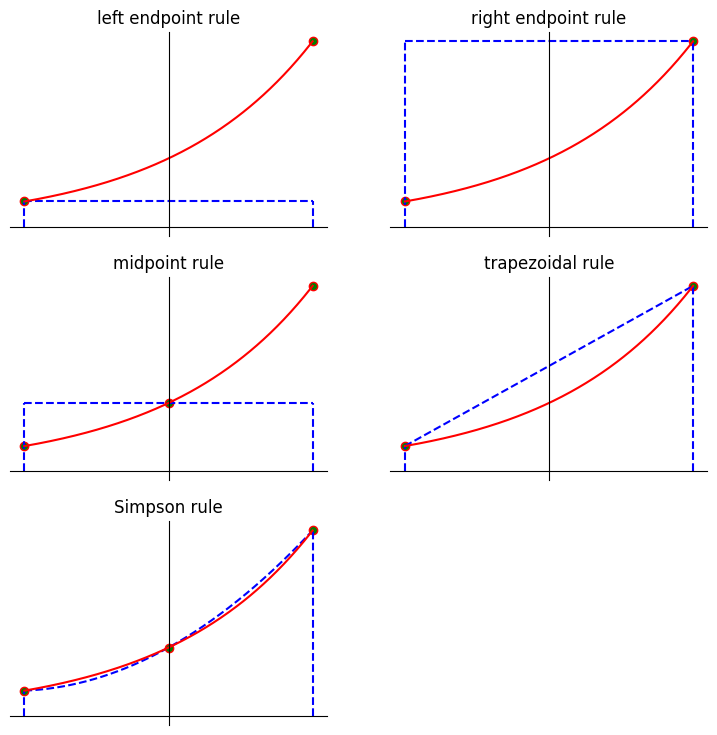

In [ ]:
# @title
x=np.linspace(-1, 1,300)
y1=function(x)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(3, 2, 1)
plt.title("left endpoint rule")
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks_position('none')
plt.plot(-1,function(-1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot(1,function(1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot((-1,-1), (0, function(-1)),'b--', scaley = False)
plt.plot((1,1), (0,function(-1)),'b--', scaley = False)
plt.plot((-1,1), (function(-1),function(-1)),'b--', scaley = False)
plt.plot(x,y1,'r')

ax = fig.add_subplot(3, 2, 2)
plt.title("right endpoint rule")
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks_position('none')
plt.plot(-1,function(-1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot(1,function(1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot((-1,-1), (0, function(1)),'b--', scaley = False)
plt.plot((1,1), (0,function(1)),'b--', scaley = False)
plt.plot((-1,1), (function(1),function(1)),'b--', scaley = False)
plt.plot(x,y1,'r')

ax = fig.add_subplot(3, 2, 3)
plt.title("midpoint rule")
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks_position('none')
plt.plot(-1,function(-1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot(0,function(0),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot(1,function(1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot((-1,-1), (0, function(0)),'b--', scaley = False)
plt.plot((1,1), (0,function(0)),'b--', scaley = False)
plt.plot((-1,1), (function(0),function(0)),'b--', scaley = False)
plt.plot(x,y1,'r')

ax = fig.add_subplot(3, 2, 4)
plt.title("trapezoidal rule")
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks_position('none')
plt.plot(-1,function(-1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot(1,function(1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot((-1,-1), (0, function(-1)),'b--', scaley = False)
plt.plot((1,1), (0,function(1)),'b--', scaley = False)
plt.plot((-1,1), (function(-1),function(1)),'b--', scaley = False)
plt.plot(x,y1,'r')

ax = fig.add_subplot(3, 2, 5)
plt.title("Simpson rule")
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks_position('none')
model = np.poly1d(np.polyfit([-1,0,1], [function(-1), function(0), function(1)], 2))
plt.plot(x,model(x), 'b--')
plt.plot(-1,function(-1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot(0,function(0),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot(1,function(1),
         marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot((-1,-1), (0, function(-1)),'b--', scaley = False)
plt.plot((1,1), (0,function(1)),'b--', scaley = False)
plt.plot(x,y1,'r')

plt.show()

## Example (Trapezoidal rule)
Consider a function $y=f(x)$ on the interval $[a,b]$. For Trapezoidal rule, by approximating the function by a straight line $y=mx+c$ passing through the points $(a,f(a)$ and $(b,f(b))$ we want to estimate the area under the curve for the interval.</br>
Hence we get a system of linear equations in $m$ and $c$.
$$ ma+c = f(a) $$
$$ mb+c= f(b) $$
With little work, integrating the linear function we obtain,
$$ \int\limits_a^b (mx+c) dx = \frac{b-a}{2}\big(m(b+a)+2c\big) = \frac{b-a}{2}(f(a)+f(b))$$
The above expression is used to approximate the integral.

## Exercise
If $Ax^2+Bx+C$ is a quadratic function passing through the points $(a,f(a)),\Big((a+b)/2 ,f\big((a+b)/2\big)\Big)$, and $(b,f(b))$, show that $$\int\limits_a^b (Ax^2+Bx+C) dx = \frac{b-a}{6}\Bigg(f(a)+4f\Big(\frac{a+b}{2}\Big)+f(b) \Bigg)$$

## General Quadrature rule
The general quadrature rule on $[a,b]$ can be defined as,
$$Q(f) = \sum\limits_{i=1}^n w_i f(x_i)$$
$x_i$: Points of evaluation.<br>
$w_i$: Weights.<br>
<br>

##Left endpoint rule :
$$n=1,x_1=a, w_1=(b-a)$$<br>

##Simpson rule:
$$\hspace{5mm}\begin{align*} &n=3,\\ &x_1=a, x_2=\frac{a+b}{2}, x_3=b,\\ &w_1=w_3=\frac{b-a}{6}, w_2= \frac{4(b-a)}{6} \end{align*}$$

## Note:
1. Weights are positive : $w_i>0.$
2. The rule is linear : $Q(f+g)=Q(f)+Q(g).$
3. $\sum\limits_{i=1}^n w_i = b-a.$

## Theorem:
Suppose a quadrature rule is exact on polynomials of degree $m$, that is,
$$\int\limits_a^b p_m(x) dx = Q(p_m)$$
without any error.<br>
Then for $f \in C^{m+1}([a,b])$, the error in the quadrature rule can be estimated as follows:
$$\Bigg| {Q(f)-\int\limits_a^b f(x) dx} \Bigg| \leq C(b-a)^{m+2}$$

## Example
Show that the midpoint rule is exact on linear functions, and hence, for any $f \in C^2([a,b])$, its error satisfies
$$\Bigg| Q_{MP}(f)-\int\limits_a^b f(x) dx \Bigg| \leq C(b-a)^3.$$

| Method &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| Integration rule &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Exact for &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Error on $[a,b]$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Required smoothness &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
|:- |:- |:- |:-| :-|
| Left endpoint|$(b-a)f(a)$|$m=0$ |$O((b-a)^2)$ |$f \in C([a,b])$ |
|Right endpoint|$(b-a)f(b)$|$m=0$ |$O((b-a)^2)$ |$f \in C([a,b])$ |
|Midpoint|$(b-a)f(\frac{a+b}{2})$|$m=1$ |$O((b-a)^3)$ |$f \in C^2([a,b])$ |
|Trapezoid|$\frac{b-a}{2}(f(a)+f(b))$|$m=1$ |$O((b-a)^3)$ |$f \in C^2([a,b])$ |
|Simpson|$\frac{b-a}{6}(f(a)+4f(\frac{a+b}{2})+f(b))$|$m=3$ |$O((b-a)^5)$ |$f \in C^4([a,b])$ |


## Composite Rule
We divide $[a,b]$ into $N$ intervals, and use quadrature rule on each subinterval.<br>
Let $x_0,x_1,\cdots,x_N$ be the points choosen from each subinterval.<br>
Using a quadrature rule we define
$$Q^c(f,a,b)=\sum\limits_{i=0}^{N-1} Q(f,x_i,x_{i+1})$$
<br><br>
Considering the subintervals are of equal length, we denote the spacing as $h = \frac{b-a}{N}$.<br>
The composite Newton-Cotes rules can now be simplified as:<br>
1. Composite Left endpoint:
$$Q^c_L (f) = h \sum\limits_{i=0}^{N-1} f(x_i)$$
2. Composite Right endpoint:
$$Q^c_R (f) = h \sum\limits_{i=1}^{N} f(x_i)$$
3. Composite midpoint:
$$Q^c_M (f) = h \sum\limits_{i=0}^{N-1} f\Big(\frac{x_i+x_{i+1}}{2}\Big)$$
4. Composite trapezoidal:
$$Q^c_T (f) = \frac{h}{2} \sum\limits_{i=0}^{N-1} \big(f(x_i)+f(x_{i+1})\big)$$
5. Composite Left endpoint:
$$Q^c_S (f) = \frac{h}{6} \sum\limits_{i=0}^{N-1} \bigg(f(x_i) + 4f\Big( \frac{x_i+x_{i+1}}{2} \Big) + f(x_{i+1}) \bigg)$$

## Error
\begin{align*}
|error| &=\left| \int\limits_a^b f(x) dx - Q^c(f,a,b) \right| \\
&= \left| \sum\limits_{i=0}^{N-1} \left(\int\limits_{x_i}^{x_{i+1}} f(x) dx - Q(f,x_i,x_{i+1}) \right) \right|\\
& \leq \sum\limits_{i=0}^N C h^k \\
& = C(b-a)h^{k-1}\\
\end{align*}

Hence,
$$\left| error \right| \leq \bar{C} h^{k-1}$$

In [ ]:
def compositeRule(function, a, b, n, rule):
    x=np.linspace(a,b,n+1)
    h=x[1]-x[0]
    if rule == 'left endpoint':
        integral = h*np.sum(function(x[:n]))
    elif rule == 'midpoint':
        integral = h*np.sum(function((x[:n]+x[1:n+1])/2))
    elif rule == 'right endpoint':
        integral = h*np.sum(function(x[1:n+1]))
    elif rule == 'trapezoidal':
        integral = (h/2)*np.sum(function(x[:n])+function(x[1:n+1]))
    elif rule == 'simpson':
        integral = (h/6)*np.sum(function(x[:n])+4*function((x[:n]+x[1:n+1])/2)+function(x[1:n+1]))
    return integral

In [ ]:
compositeRule(function,0,np.pi,10,'left endpoint')

18.844641824467374

In [ ]:
compositeRule(function,0,np.pi,10,'midpoint')

22.049904103195395

In [ ]:
compositeRule(function,0,np.pi,10,'right endpoint')

25.800345556520277

In [ ]:
compositeRule(function,0,np.pi,10,'trapezoidal')

22.322493690493825

In [ ]:
compositeRule(function,0,np.pi,10,'simpson')

22.14076729896154

In [ ]:
compositeRule(function,0,np.pi,100,'left endpoint')

21.794728415201867

In [ ]:
np.exp(np.pi)-1

22.140692632779267

## Example
Show that we get $O(h^2)$ convergence for the composite midpoint rule for the function $f(x)=\sin(x)-x^3$ on $[1,2]$.

In [ ]:
truesoln = np.cos(1)-np.cos(2) - (16-1)/4
print("True solution = ", truesoln)

True solution =  -2.7935508575847177


In [ ]:
def func(x):
  return np.sin(x)-x**3

In [ ]:
a=1
b=2
hArr=[]
errArr=[]
for i in [10,20,40,80]:
  I = compositeRule(func,a,b,i,'midpoint')
  error = np.abs(I-truesoln)
  h=(b-a)/i
  hArr.append(h)
  errArr.append(error)
  print("Approximate integral = ", I, "     Error = ",error, "   h = ",h)

Approximate integral =  -2.7894022208429274      Error =  0.004148636741790224    h =  0.1
Approximate integral =  -2.792513720200544      Error =  0.0010371373841735476    h =  0.05
Approximate integral =  -2.7932915746009064      Error =  0.000259282983811282    h =  0.025
Approximate integral =  -2.7934860369238925      Error =  6.482066082513782e-05    h =  0.0125


In [ ]:
np.log(errArr[3]/errArr[2])/np.log(hArr[3]/hArr[2])

2.0000018946614158

## Gaussian Quadrature
Note that:
* Composite methods previously seen have preselected $x$-values. That is, the points chosen for the discretization of any subinterval is not related to the quadrature rule.
* However, if the $x$-values are optimally chosen to best fit the chosen quadrature rule, then we can achieve a higher accuracy with fewer points.

## Example
Let us design a two point rule for the function $f(x)$ on the interval $[-1,1]$
$$I(f)=c_1f(x_1)+c_2f(x_2).$$
This rule has four parameters, and we want to choose them in a way that the rule is exact for higher degree polynomials.

Note:
* For the rule to be exact on constant functions, it is enough for it to be exact for $f(x)=1$. That is
$$\int\limits_{-1}^1 1dx = c_1+c_2 \Rightarrow 2=c_1+c_2.$$
* For the rule to be exact on linear functions, it is enough for it to be exact for $f(x)=x$. That is
$$\int\limits_{-1}^1 xdx = c_1x_1+c_2x_2 \Rightarrow 0=c_1x_1+c_2x_2.$$
* For the rule to be exact on quadratics, it is enough for it to be exact for $f(x)=x^2$. That is
$$\int\limits_{-1}^1 x^2dx = c_1x_1^2+c_2x_2^2 \Rightarrow \frac{2}{3}=c_1x_1^2+c_2x_2^2.$$
* For the rule to be exact on cubics, it is enough for it to be exact for $f(x)=x^3$. That is
$$\int\limits_{-1}^1 x^3dx = c_1x_1^3+c_2x_2^3 \Rightarrow 0=c_1x_1^3+c_2x_2^3.$$

At this point we have four equations and we can solve the following system to obtain the values of the four parameters.
\begin{align*}
  c_1+c_2 &=2\\
  c_1x_1+c_2x_2&=0\\
  c_1x_1^2+c_2x_2^2&=\frac{2}{3}\\
  c_1x_1^3+c_2x_2^3&=0\\
\end{align*}

We use the Newton's method for higher dimensions to obtain the zeros for the function
$$\vec{f}(c_1,c_2,x_1,x_2) = \vec{0}$$
where,
$$\vec{f}(c_1,c_2,x_1,x_2)=$$

In [ ]:
def func(c,x):
  return np.array([c[0]+c[1]-2,
                   c[0]*x[0]+c[1]*x[1],
                   c[0]*x[0]**2+c[1]*x[1]**2-2/3,
                   c[0]*x[0]**3+c[1]*x[1]**3])

def jacobian(c,x):
  return np.array([[1, 1, 0, 0],
                    [x[0] ,x[1] ,c[0] ,c[1]],
                    [x[0]**2 ,x[1]**2 ,2*c[0]*x[0] ,2*c[1]*x[1]],
                    [x[0]**3 ,x[1]**3 ,3*c[0]*x[0]**2 ,3*c[1]*x[1]**2]
                    ])


In [ ]:
# N-dimensional Newton
def newtonsHiDim(c0,x0,func,jacobian,tol):
    y0=np.concatenate((c0,x0))
    error = 1
    count=0
    while error>tol and count < 1000:
        count+=1
        print(y0[0:2],y0[2:4])
        ynew = y0 - np.dot(np.linalg.inv(jacobian(y0[0:2],y0[2:4])), func(y0[0:2],y0[2:4]))
        error = np.linalg.norm(ynew-y0)
        y0=ynew
    return ynew[0:2],ynew[2:4]

In [ ]:
c0=np.array([0.5,1.5])
x0 = np.array([-1,1])
c,x = newtonsHiDim(c0,x0,func, jacobian, 10**(-12))
print("\ncoefficients = ",c, "    xvals = ", x)
print("\nFunction = ", func(c,x))

[0.5 1.5] [-1.  1.]
[1. 1.] [-0.33333333  0.77777778]
[0.92 1.08] [-0.66666667  0.57777778]
[0.98528608 1.01471392] [-0.58301908  0.57187264]
[0.99999566 1.00000434] [-0.57729546  0.57729488]
[1. 1.] [-0.57735027  0.57735027]
[1. 1.] [-0.57735027  0.57735027]

coefficients =  [1. 1.]     xvals =  [-0.57735027  0.57735027]

Function =  [0. 0. 0. 0.]


## Note:
The optimal coefficients(weights) are $1$ and $1$, and the optimal $x$-values are $-\frac{1}{\sqrt{3}}=-0.57735027$ and $\frac{1}{\sqrt{3}}=0.57735027$.

Hence the Gaussian quadrature rule with two points on the interval $[-1,1]$ can be written as
$$Q_G^2(f,-1,1) = f\left(-\frac{1}{\sqrt{3}}\right)+f\left(\frac{1}{\sqrt{3}}\right)$$

* This two point rule is exact on cubics, ie, it has accuracy of the same order as Simpson's.
* The point Gaussian quadrature is accurate for degree-six polynomials.

## Translate to general interval
Even though we designed the above rule for $[-1,1]$, we can extend it to any interval $[a,b]$ as
$$Q_G^2(f,a,b)=\frac{b-a}{2}\left[ f\left(\left(\frac{b-a}{2}\right)x_1 + \left(\frac{a+b}{2}\right)\right) + f\left(\left(\frac{b-a}{2}\right)x_2 + \left(\frac{a+b}{2}\right)\right)\right].$$
### Hint:
Use the substitution $$x=\left(\frac{b-a}{2}\right)u + \left(\frac{a+b}{2}\right)$$
for the transformation $$\int\limits_a^b f(x) dx = \frac{b-a}{2} \int\limits_{-1}^1 f\left(\left(\frac{b-a}{2}\right)u + \left(\frac{a+b}{2}\right)\right) du$$

<br><br>

## Example
Approximate $\int\limits_1^2 e^x dx$ using two point Gaussian quadrature.

In [ ]:
approx=0.5*(np.exp(0.5*x[0]+1.5)+np.exp(0.5*x[1]+1.5))
trueInt=np.exp(2)-np.exp(1)
print("True value = ",trueInt, "    Approx value = ",approx)

True value =  4.670774270471606     Approx value =  4.669726507513409
